# Business Case:Zee Recommender Systems 

# Problem Statement:

Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

# Recommendation Systems

Recommendation engines are a subclass of machine learning which generally deal with ranking or rating products / users. Loosely defined, a recommender system is a system which predicts ratings a user might give to a specific item. These predictions will then be ranked and returned back to the user.

There are many different ways to build recommender systems, some use algorithmic and formulaic approaches like Page Rank while others use more modelling centric approaches like collaborative filtering, content based, link prediction, etc

# Collaborative Filtering Systems

Collaborative filtering is the process of predicting the interests of a user by identifying preferences and information from many users. This is done by filtering data for information or patterns using techniques involving collaboration among multiple agents, data sources, etc. The underlying intuition behind collaborative filtering is that if users A and B have similar taste in a product, then A and B are likely to have similar taste in other products as well.

# Content Based Systems

Content based systems generate recommendations based on the users preferences and profile. They try to match users to items which they’ve liked previously. The level of similarity between items is generally established based on attributes of items liked by the user. Unlike most collaborative filtering models which leverage ratings between target user and other users, content based models focus on the ratings provided by the target user themselves. In essence, the content based approach leverages different sources of data to generate recommendations.

# Data Dictionary:



RATINGS FILE DESCRIPTION: 


All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp


* UserIDs range between 1 and 6040
* MovieIDs range between 1 and 3952
* Ratings are made on a 5-star scale (whole-star ratings only)
* Timestamp is represented in seconds
* Each user has at least 20 ratings


USERS FILE DESCRIPTION:

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

* Gender is denoted by a "M" for male and "F" for female
* Age is chosen from the following ranges:
        1: "Under 18"
        18: "18-24"
        25: "25-34"
        35: "35-44"
        45: "45-49"
        50: "50-55"
        56: "56+"
* Occupation is chosen from the following choices:
        0: "other" or not specified
        1: "academic/educator"
        2: "artist"
        3: "clerical/admin"
        4: "college/grad student"
        5: "customer service"
        6: "doctor/health care"
        7: "executive/managerial"
        8: "farmer"
        9: "homemaker"
        10: "K-12 student"
        11: "lawyer"
        12: "programmer"
        13: "retired"
        14: "sales/marketing"
        15: "scientist"
        16: "self-employed"
        17: "technician/engineer"
        18: "tradesman/craftsman"
        19: "unemployed"
        20: "writer"

MOVIES FILE DESCRIPTION:

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

* Titles are identical to titles provided by the IMDB (including year of release)
* Genres are pipe-separated and are selected from the following genres:
        Action
        Adventure
        Animation
        Children's
        Comedy
        Crime
        Documentary
        Drama
        Fantasy
        Film-Noir
        Horror
        Musical
        Mystery
        Romance
        Sci-Fi
        Thriller
        War
        Western

In [ ]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
movies = pd.read_fwf('zee-movies.dat', encoding='ISO-8859-1')
ratings = pd.read_fwf('zee-ratings.dat', encoding='ISO-8859-1')
users = pd.read_fwf('zee-users.dat', encoding='ISO-8859-1')	

# Data Formatting

In [ ]:
#Formatting Movies Dataset
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [ ]:
#Dropping Unnamed column which is not Required
movies.drop(columns=['Unnamed: 1','Unnamed: 2'], axis=1, inplace=True)

In [ ]:
movies=movies['Movie ID::Title::Genres'].str.split('::',expand=True)
movies.columns=['Movie ID','Title','Genres']

In [ ]:
movies.rename(columns={'Movie ID':'MovieID'},inplace=True)

In [ ]:
movies.head(5)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
mov=movies.copy()
mov.dropna(inplace=True)
mov.Genres=mov.Genres.str.split('|')

In [ ]:
for i in mov['Genres']:
  for j in range(len(i)):
    if i[j]=='Ro' or i[j]=='Rom' or i[j]=='R' or i[j]=='Roman' or i[j]=='Roma':
      i[j]='Romance'
    elif i[j]=='Chil' or i[j]=='Childre' or i[j]=='Childr' or i[j]=="Children'" or i[j]=='Chi' or i[j]=='Children' or i[j]=="Children'S":
      i[j]="Children's"
    elif i[j]=='Fantas' or i[j]=='Fant' or i[j]=='F':
      i[j]='Fantasy'
    elif i[j]=='Dr' or i[j]=='Dram' or i[j]=='D':
      i[j]='Drama'
    elif i[j]=='Documenta' or i[j]=='Docu' or i[j]=='Document' or i[j]=='Documen':
      i[j]='Documentary'
    elif i[j]=='Wester' or i[j]=='We':
      i[j]='Western'
    elif i[j]=='Animati':
      i[j]='Animation'
    elif i[j]=='Come' or i[j]=='Comed' or i[j]=='Com':
      i[j]='Comdey'
    elif i[j]=='Sci-F' or i[j]=='S' or i[j]=='Sci-' or i[j]=='Sci':
      i[j]='Sci-Fi'
    elif i[j]=='Adv' or i[j]=='Adventu' or i[j]=='Adventur' or i[j]=='A' or i[j]=='Advent':
      i[j]='Adventure'
    elif i[j]=='Horro' or i[j]=='Horr':
      i[j]='Horror'
    elif i[j]=='Th' or i[j]=='Thri' or i[j]=='Thrille':
      i[j]='Thriller'
    elif i[j]=='Acti':
      i[j]='Action'
    elif i[j]=='Wa':
      i[j]='War'
    elif i[j]=='Music':
      i[j]='Musical'
    elif i[j]=='':
      i[j]='No Genre'

In [ ]:
#Formatting Ratings Dataset
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [ ]:
ratings=ratings['UserID::MovieID::Rating::Timestamp'].str.split('::',expand=True)
ratings.columns=['UserID','MovieID','Rating','Timestamp']

In [ ]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
#Formatting Ratings Dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users=users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::',expand=True)
users.columns=['UserID','Gender','Age','Occupation','Zip-code']

In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.replace({'Age':{'1':"Under 18",
                     '18':"18-24",
                     '25':"25-34",
                     '35':"35-44",
                     '45':"45-49",
                     '50':"50-55",
                     '56':"56+"}},inplace=True)

In [ ]:
users.replace({'Occupation':{'0': "other",
    '1': "academic/educator",
    '2': "artist",
    '3': "clerical/admin",
    '4': "college/grad student",
    '5': "customer service",
    '6': "doctor/health care",
    '7': "executive/managerial",
    '8': "farmer",
    '9': "homemaker",
    '10': "K-12 student",
    '11': "lawyer",
    '12': "programmer",
    '13': "retired",
    '14': "sales/marketing",
    '15': "scientist",
    '16': "self-employed",
    '17': "technician/engineer",
    '18': "tradesman/craftsman",
    '19': "unemployed",
    '20': "writer"
}},inplace=True)

In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


In [ ]:
#Merging the DataFrames
df_1=pd.merge(mov,ratings,how='inner',on='MovieID')
df_1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268
1,1,Toy Story (1995),"[Animation, Children's, Comedy]",6,4,978237008
2,1,Toy Story (1995),"[Animation, Children's, Comedy]",8,4,978233496
3,1,Toy Story (1995),"[Animation, Children's, Comedy]",9,5,978225952
4,1,Toy Story (1995),"[Animation, Children's, Comedy]",10,5,978226474


In [ ]:
df=pd.merge(df_1,users,how='inner',on='UserID')
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,index,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,0,F,Under 18,K-12 student,48067
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,0,F,Under 18,K-12 student,48067
2,150,Apollo 13 (1995),[Drama],1,5,978301777,0,F,Under 18,K-12 student,48067
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy]",1,4,978300760,0,F,Under 18,K-12 student,48067
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,0,F,Under 18,K-12 student,48067


In [ ]:
df.shape

(996144, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996144 entries, 0 to 996143
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     996144 non-null  object
 1   Title       996144 non-null  object
 2   Genres      996144 non-null  object
 3   UserID      996144 non-null  object
 4   Rating      996144 non-null  object
 5   Timestamp   996144 non-null  object
 6   Gender      996144 non-null  object
 7   Age         996144 non-null  object
 8   Occupation  996144 non-null  object
 9   Zip-code    996144 non-null  object
dtypes: object(10)
memory usage: 83.6+ MB


In [ ]:
df.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

**Observations:**

* There are No missing Values after Merging all DataFrames

# Feature Engineering and Data Cleaning

In [ ]:
#extracting Release Year
df['Release_Year']=df['Title'].apply(lambda x:x.split("(")[-1].split(')')[0])

In [ ]:
# convert string to an integer
df['MovieID'] = df['MovieID'].astype(int)
df['UserID'] = df['UserID'].astype(int)
df['Rating'] = df['Rating'].astype(int)
df['Timestamp'] = df['Timestamp'].astype(int)
df['Release_Year'] = df['Release_Year'].astype(int)

In [ ]:
df['Release_Year'].unique()

array([1995, 1977, 1993, 1992, 1937, 1991, 1996, 1964, 1939, 1958, 1950,
       1941, 1965, 1982, 1975, 1987, 1962, 1989, 1985, 1959, 1997, 1998,
       1988, 1942, 1947, 1999, 1980, 1983, 1986, 1990, 2000, 1994, 1978,
       1961, 1984, 1972, 1976, 1981, 1973, 1974, 1940, 1952, 1954, 1953,
       1944, 1968, 1957, 1946, 1949, 1951, 1963, 1971, 1979, 1967, 1966,
       1948, 1933, 1970, 1969, 1930, 1955, 1956, 1920, 1925, 1938, 1960,
       1935, 1932, 1931, 1945, 1943, 1934, 1936, 1929, 1926, 1927, 1922,
       1919, 1921, 1923, 1928])

In [ ]:
bins=[1919,1929,1939,1949,1959,1969,1979,1989,2000]
labels=['20s','30s','40s','50s','60s','70s','80s','90s']
df['Release_Decade']=pd.cut(df['Release_Year'],bins=bins,labels=labels)

In [ ]:
df['Title']=df['Title'].apply(lambda x:x.split("(")[0])

In [ ]:
import re
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

In [ ]:
#TO remove special characters and space from Title column after splitting
df['Title']=df['Title'].apply(lambda x: preprocess_string(str(x)))

In [ ]:
from datetime import datetime

#Reducing Timestamp which are in seconds to Hour
df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)

In [ ]:
df['Zip-code']=df['Zip-code'].apply(lambda x:x.split('-')[0])

In [ ]:
df.head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,index,Gender,Age,Occupation,Zip-code,Release_Year,Release_Decade
0,1,toy story,"[Animation, Children's, Comedy]",1,5,23,0,F,Under 18,K-12 student,48067,1995,80s
1,48,pocahontas,"[Animation, Children's, Musical, Romance]",1,5,23,0,F,Under 18,K-12 student,48067,1995,80s
2,150,apollo,[Drama],1,5,22,0,F,Under 18,K-12 student,48067,1995,80s
3,260,star wars episode iv a new hope,"[Action, Adventure, Fantasy]",1,4,22,0,F,Under 18,K-12 student,48067,1977,60s
4,527,schindlers list,"[Drama, War]",1,5,23,0,F,Under 18,K-12 student,48067,1993,80s


# Calculating Average Time spent and ratings done by users

In [ ]:
users1=df.groupby('UserID').agg({'Rating':'mean','Timestamp':'mean'}).rename(columns={'Rating':'Average_Rating',
                                                                                     'Timestamp':'Average_Timestamp'})
users1=users1.reset_index()

In [ ]:
users2=df.groupby('UserID').agg({'Rating':'count'}).rename(columns={'Rating':'Rating_Counts'})
users2=users2.reset_index()

In [ ]:
users3=pd.merge(users1,users2,how='left',on='UserID')
users3

,UserID,Average_Rating,Average_Timestamp,Rating_Counts
0,1,4.188679,22.245283,53
1,2,3.713178,21.155039,129
2,3,3.901961,21.000000,51
3,4,4.190476,20.000000,21
4,5,3.146465,6.015152,198
...,...,...,...,...
6035,6036,3.297052,5.236961,882
6036,6037,3.715000,1.595000,200
6037,6038,3.800000,7.400000,20
6038,6039,3.875000,22.550000,120


In [ ]:
# Merging this data to Main Dataframe
df=pd.merge(df,users3,how='left',on='UserID')
df.head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,index,Gender,Age,Occupation,Zip-code,Release_Year,Release_Decade,Average_Rating,Average_Timestamp,Rating_Counts
0,1,toy story,"[Animation, Children's, Comedy]",1,5,23,0,F,Under 18,K-12 student,48067,1995,80s,4.188679,22.245283,53
1,48,pocahontas,"[Animation, Children's, Musical, Romance]",1,5,23,0,F,Under 18,K-12 student,48067,1995,80s,4.188679,22.245283,53
2,150,apollo,[Drama],1,5,22,0,F,Under 18,K-12 student,48067,1995,80s,4.188679,22.245283,53
3,260,star wars episode iv a new hope,"[Action, Adventure, Fantasy]",1,4,22,0,F,Under 18,K-12 student,48067,1977,60s,4.188679,22.245283,53
4,527,schindlers list,"[Drama, War]",1,5,23,0,F,Under 18,K-12 student,48067,1993,80s,4.188679,22.245283,53


In [ ]:
df.shape

(996144, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996144 entries, 0 to 996143
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   MovieID            996144 non-null  int64   
 1   Title              996144 non-null  object  
 2   Genres             996144 non-null  object  
 3   UserID             996144 non-null  int64   
 4   Rating             996144 non-null  int64   
 5   Timestamp          996144 non-null  int64   
 6   Gender             996144 non-null  int64   
 7   Age                996144 non-null  object  
 8   Occupation         996144 non-null  object  
 9   Zip-code           996144 non-null  object  
 10  Release_Year       996144 non-null  int64   
 11  Release_Decade     996099 non-null  category
 12  Average_Rating     996144 non-null  float64 
 13  Average_Timestamp  996144 non-null  float64 
 14  Rating_Counts      996144 non-null  int64   
dtypes: category(1), float64(2), int64(

In [ ]:
df_numerical=df.select_dtypes(exclude='object')
df_categorical=df.select_dtypes(include='object')

In [ ]:
df_numerical.columns

Index(['MovieID', 'UserID', 'Rating', 'Timestamp', 'Gender', 'Release_Year',
       'Release_Decade', 'Average_Rating', 'Average_Timestamp',
       'Rating_Counts'],
      dtype='object')

In [ ]:
df_categorical.columns

Index(['Title', 'Genres', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

# Univariate analysis

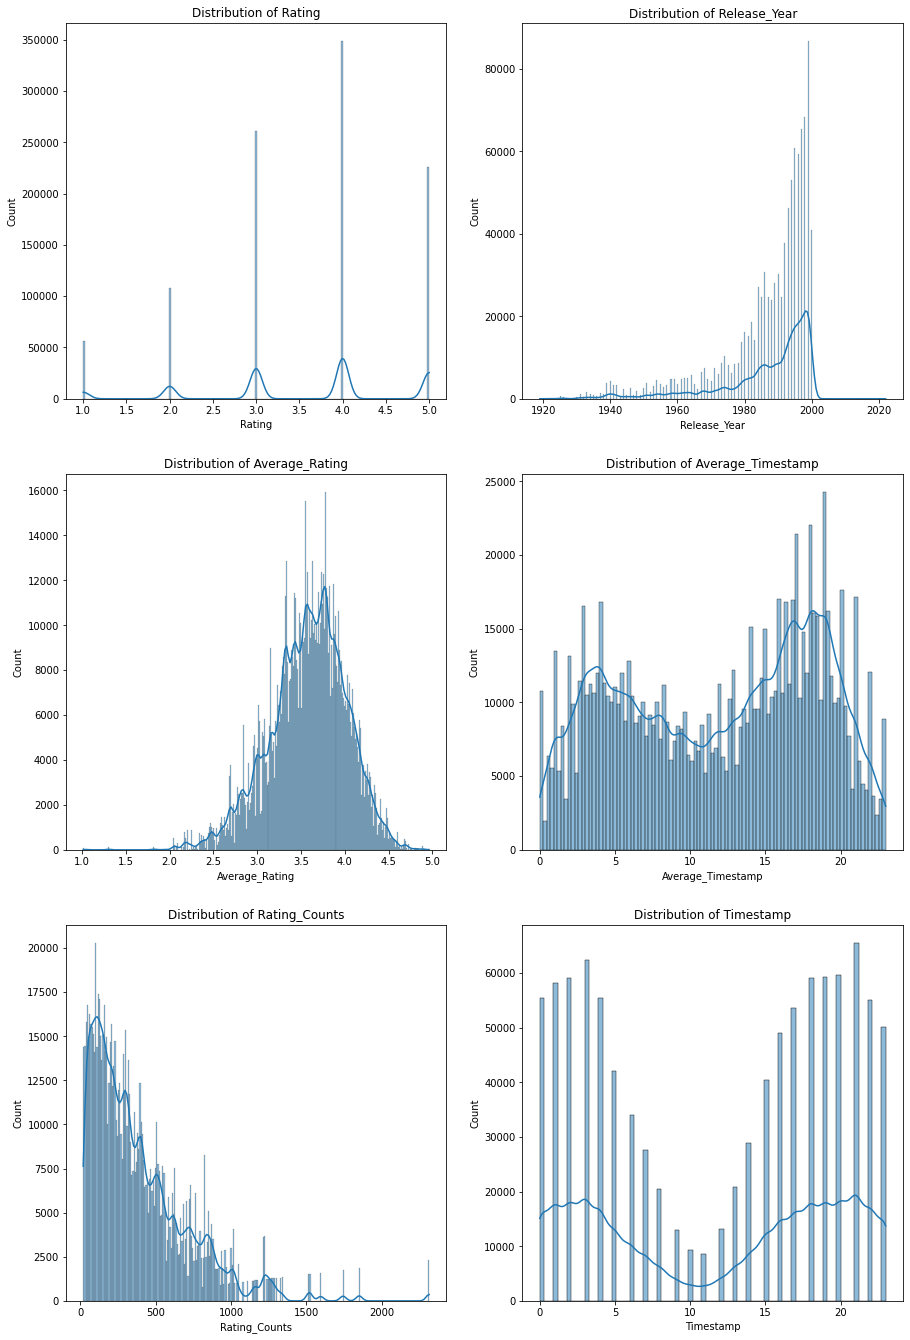

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.9)

sns.histplot(data=df, x="Rating", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of Rating')
sns.histplot(data=df, x="Release_Year", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of Release_Year')
sns.histplot(data=df, x="Average_Rating", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of Average_Rating')
sns.histplot(data=df, x="Average_Timestamp", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of Average_Timestamp')
sns.histplot(data=df, x="Rating_Counts", kde=True, ax=axis[2,0])
axis[2,0].set_title('Distribution of Rating_Counts')
sns.histplot(data=df, x="Timestamp", kde=True, ax=axis[2,1])
axis[2,1].set_title('Distribution of Timestamp')
plt.show()

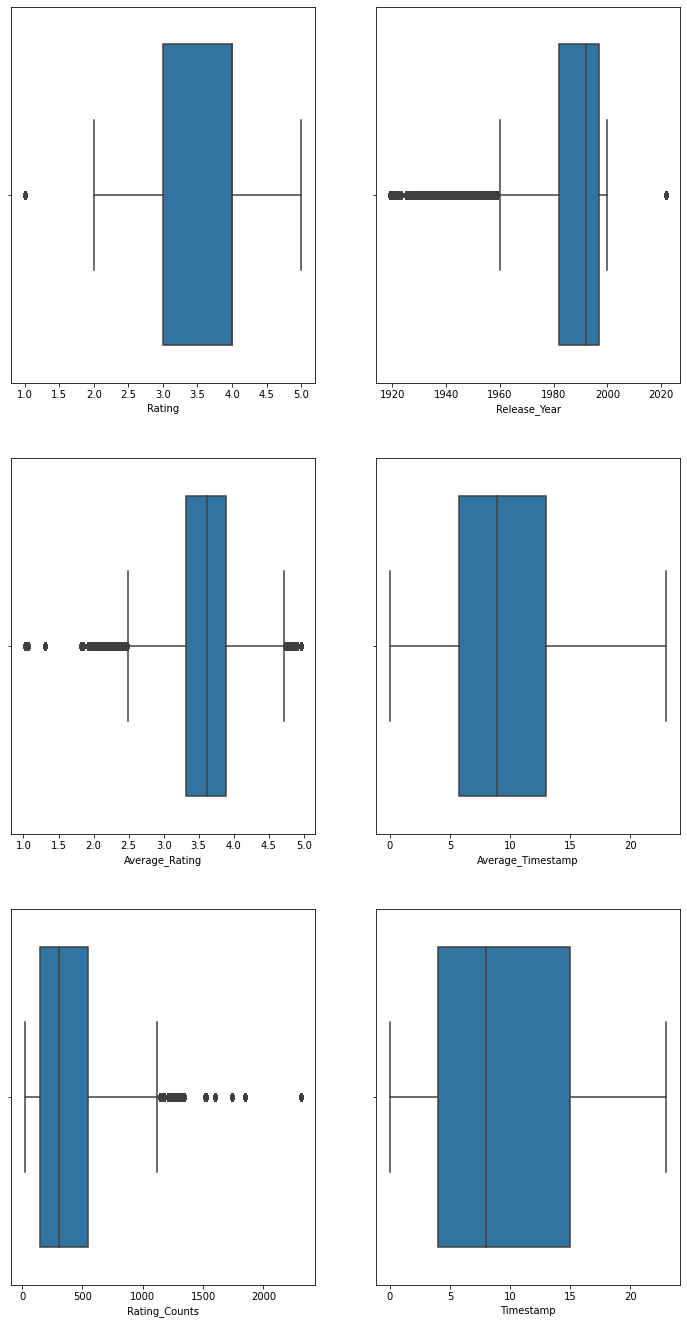

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.9)

sns.boxplot(data=df, x="Rating", ax=axis[0,0])
sns.boxplot(data=df, x="Release_Year", ax=axis[0,1])
sns.boxplot(data=df, x="Average_Rating", ax=axis[1,0])
sns.boxplot(data=df, x="Average_Timestamp", ax=axis[1,1])
sns.boxplot(data=df, x="Rating_Counts", ax=axis[2,0])
sns.boxplot(data=df, x="Timestamp", ax=axis[2,1])
plt.show()

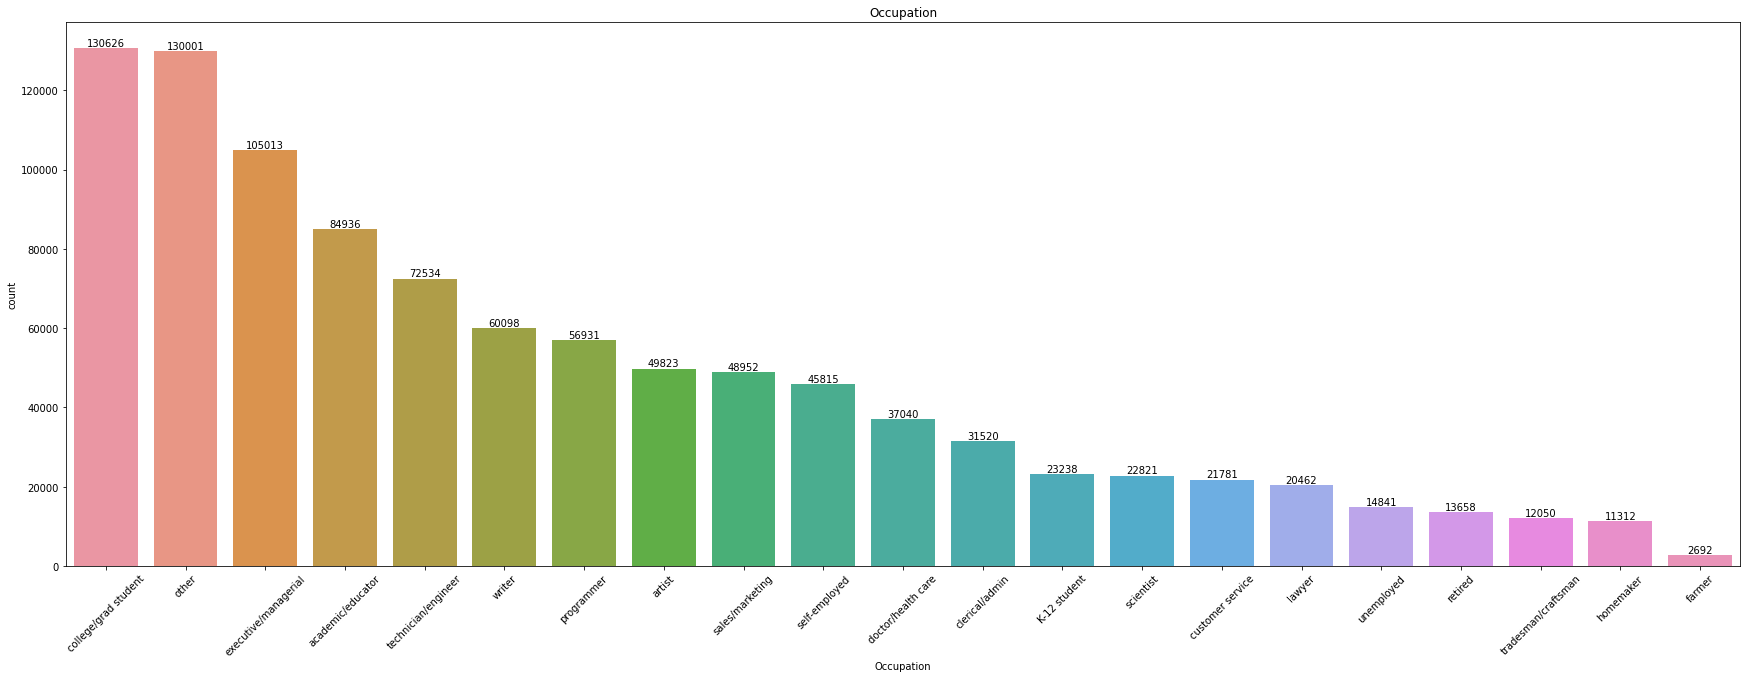

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Occupation', 
              order = df['Occupation'].value_counts().index[:], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Occupation')
plt.xticks(rotation=45)
plt.show()

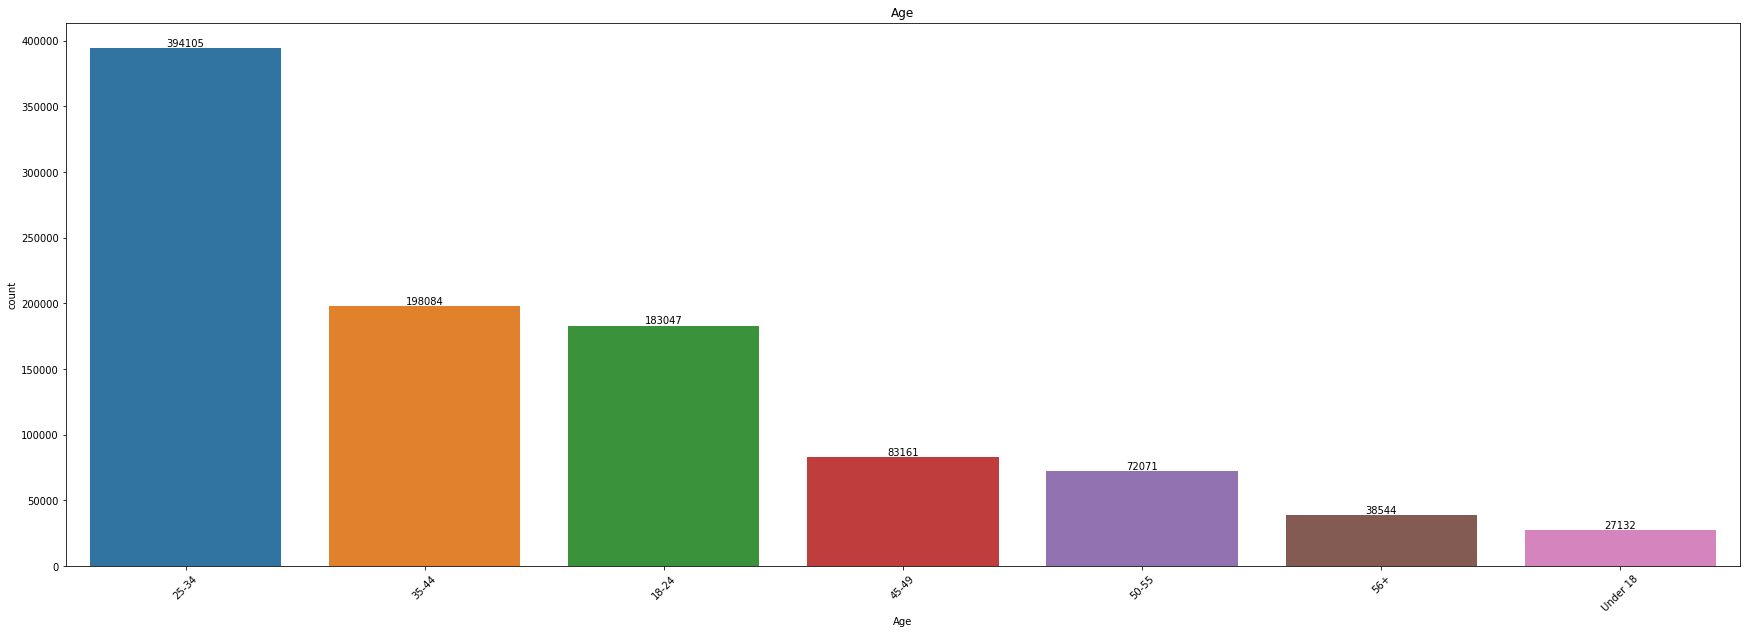

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Age', 
              order = df['Age'].value_counts().index[:], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Age')
plt.xticks(rotation=45)
plt.show()

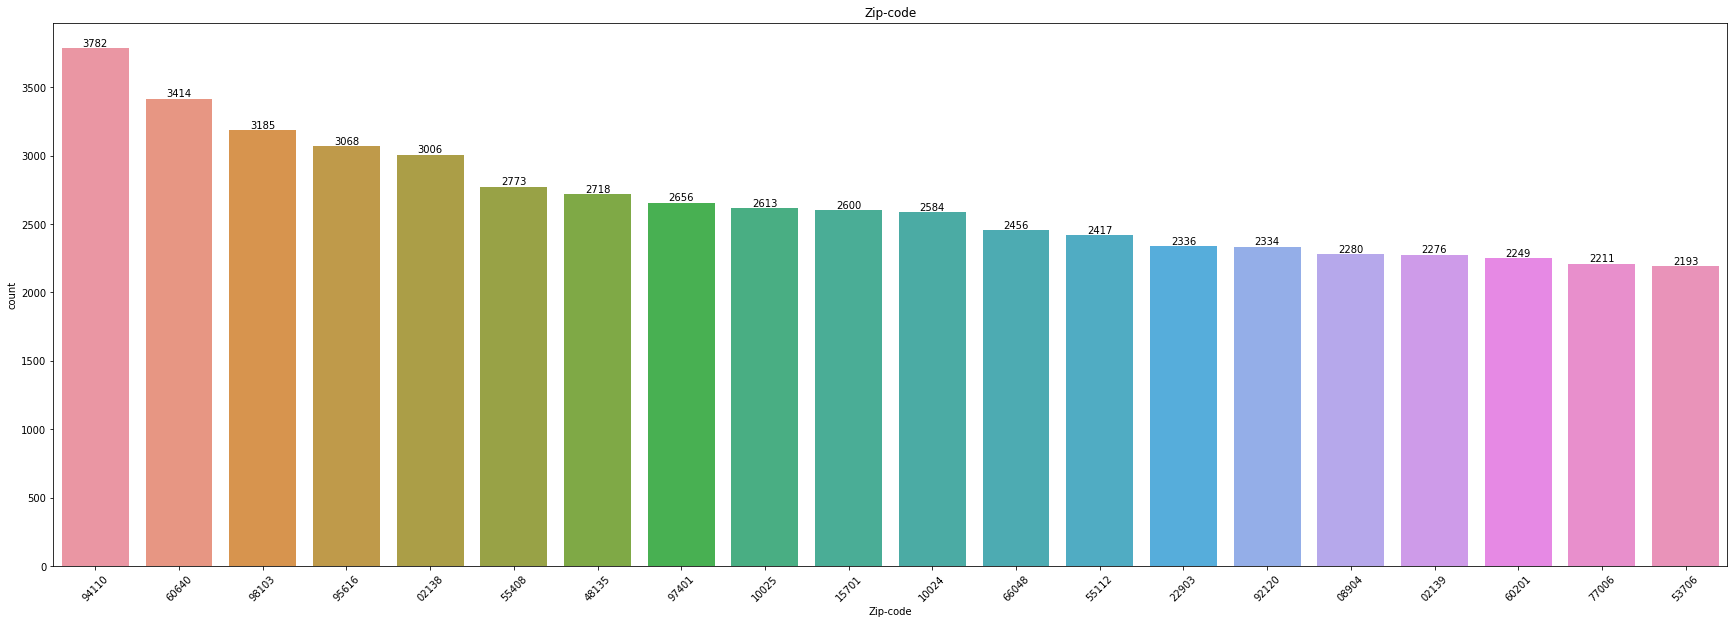

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Zip-code', 
              order = df['Zip-code'].value_counts().index[:20], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Zip-code')
plt.xticks(rotation=45)
plt.show()

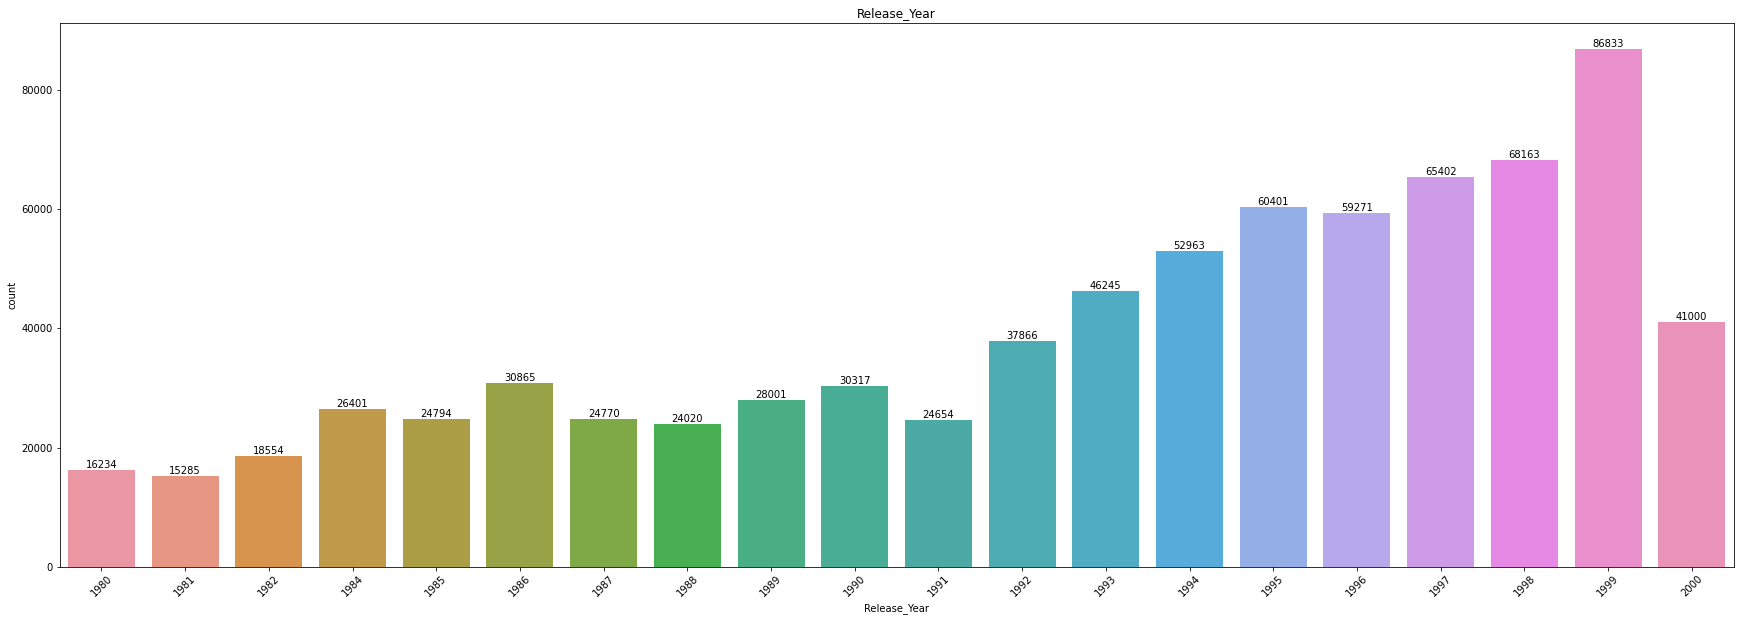

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Release_Year', 
              order = sorted(df['Release_Year'].value_counts().index[:20]), linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Release_Year')
plt.xticks(rotation=45)
plt.show()

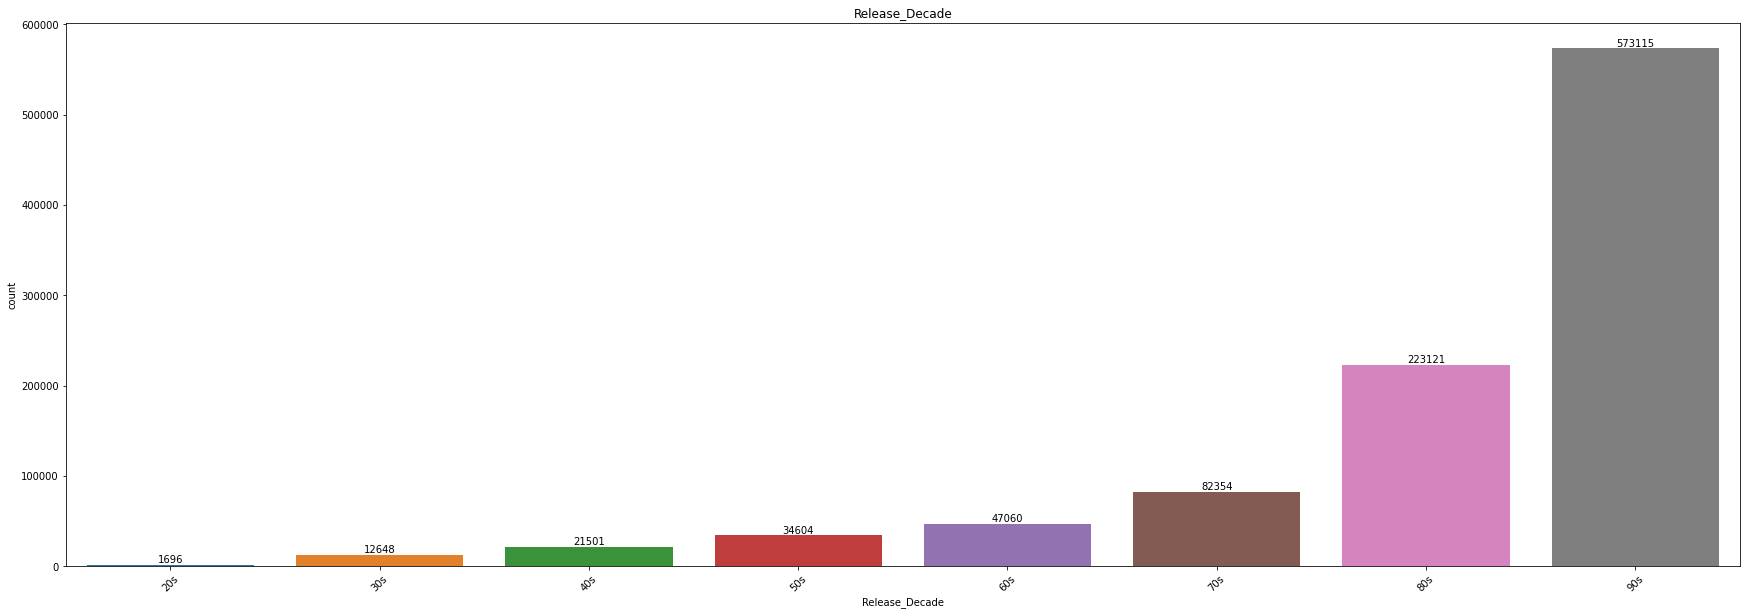

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Release_Decade', 
              order = sorted(df['Release_Decade'].value_counts().index[:20]), linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Release_Decade')
plt.xticks(rotation=45)
plt.show()

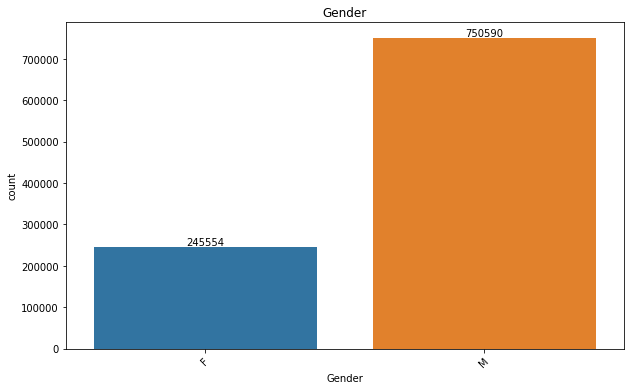

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data = df, 
              x = 'Gender', 
              order = sorted(df['Gender'].value_counts().index[:]), linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Replacing Gender with 0 and 1 for analysis
df.replace({'Gender':{'F':0,'M':1}},inplace=True)

**Observations:**
1. Movies with Rating 4 are more.
2. More Movies are released on 90's.
3. More Users has Screen time more than 20 hours.
4. College/Grad Students are more to see the movie and Rate them.
5. More males users are watching Movies and rating them.
6. More Users are from Area zip code- 94110

# Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='Timestamp', ylabel='Gender'>

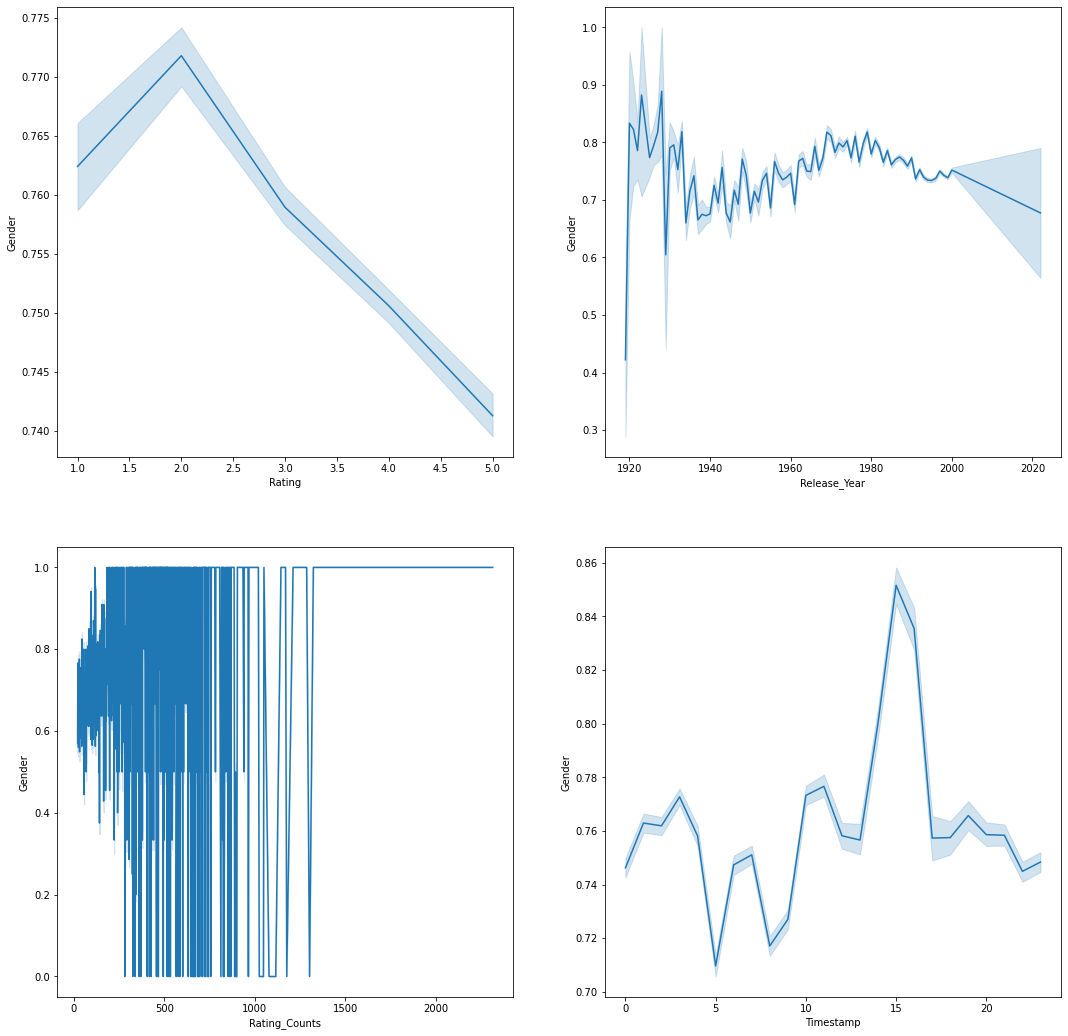

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.5)

sns.lineplot(x='Rating', y='Gender', data=df, ax=axis[0,0])
sns.lineplot(x='Release_Year',y='Gender', data=df, ax=axis[0,1])
sns.lineplot(x='Rating_Counts',y='Gender', data=df, ax=axis[1,0])
sns.lineplot(x='Timestamp',y='Gender', data=df, ax=axis[1,1])

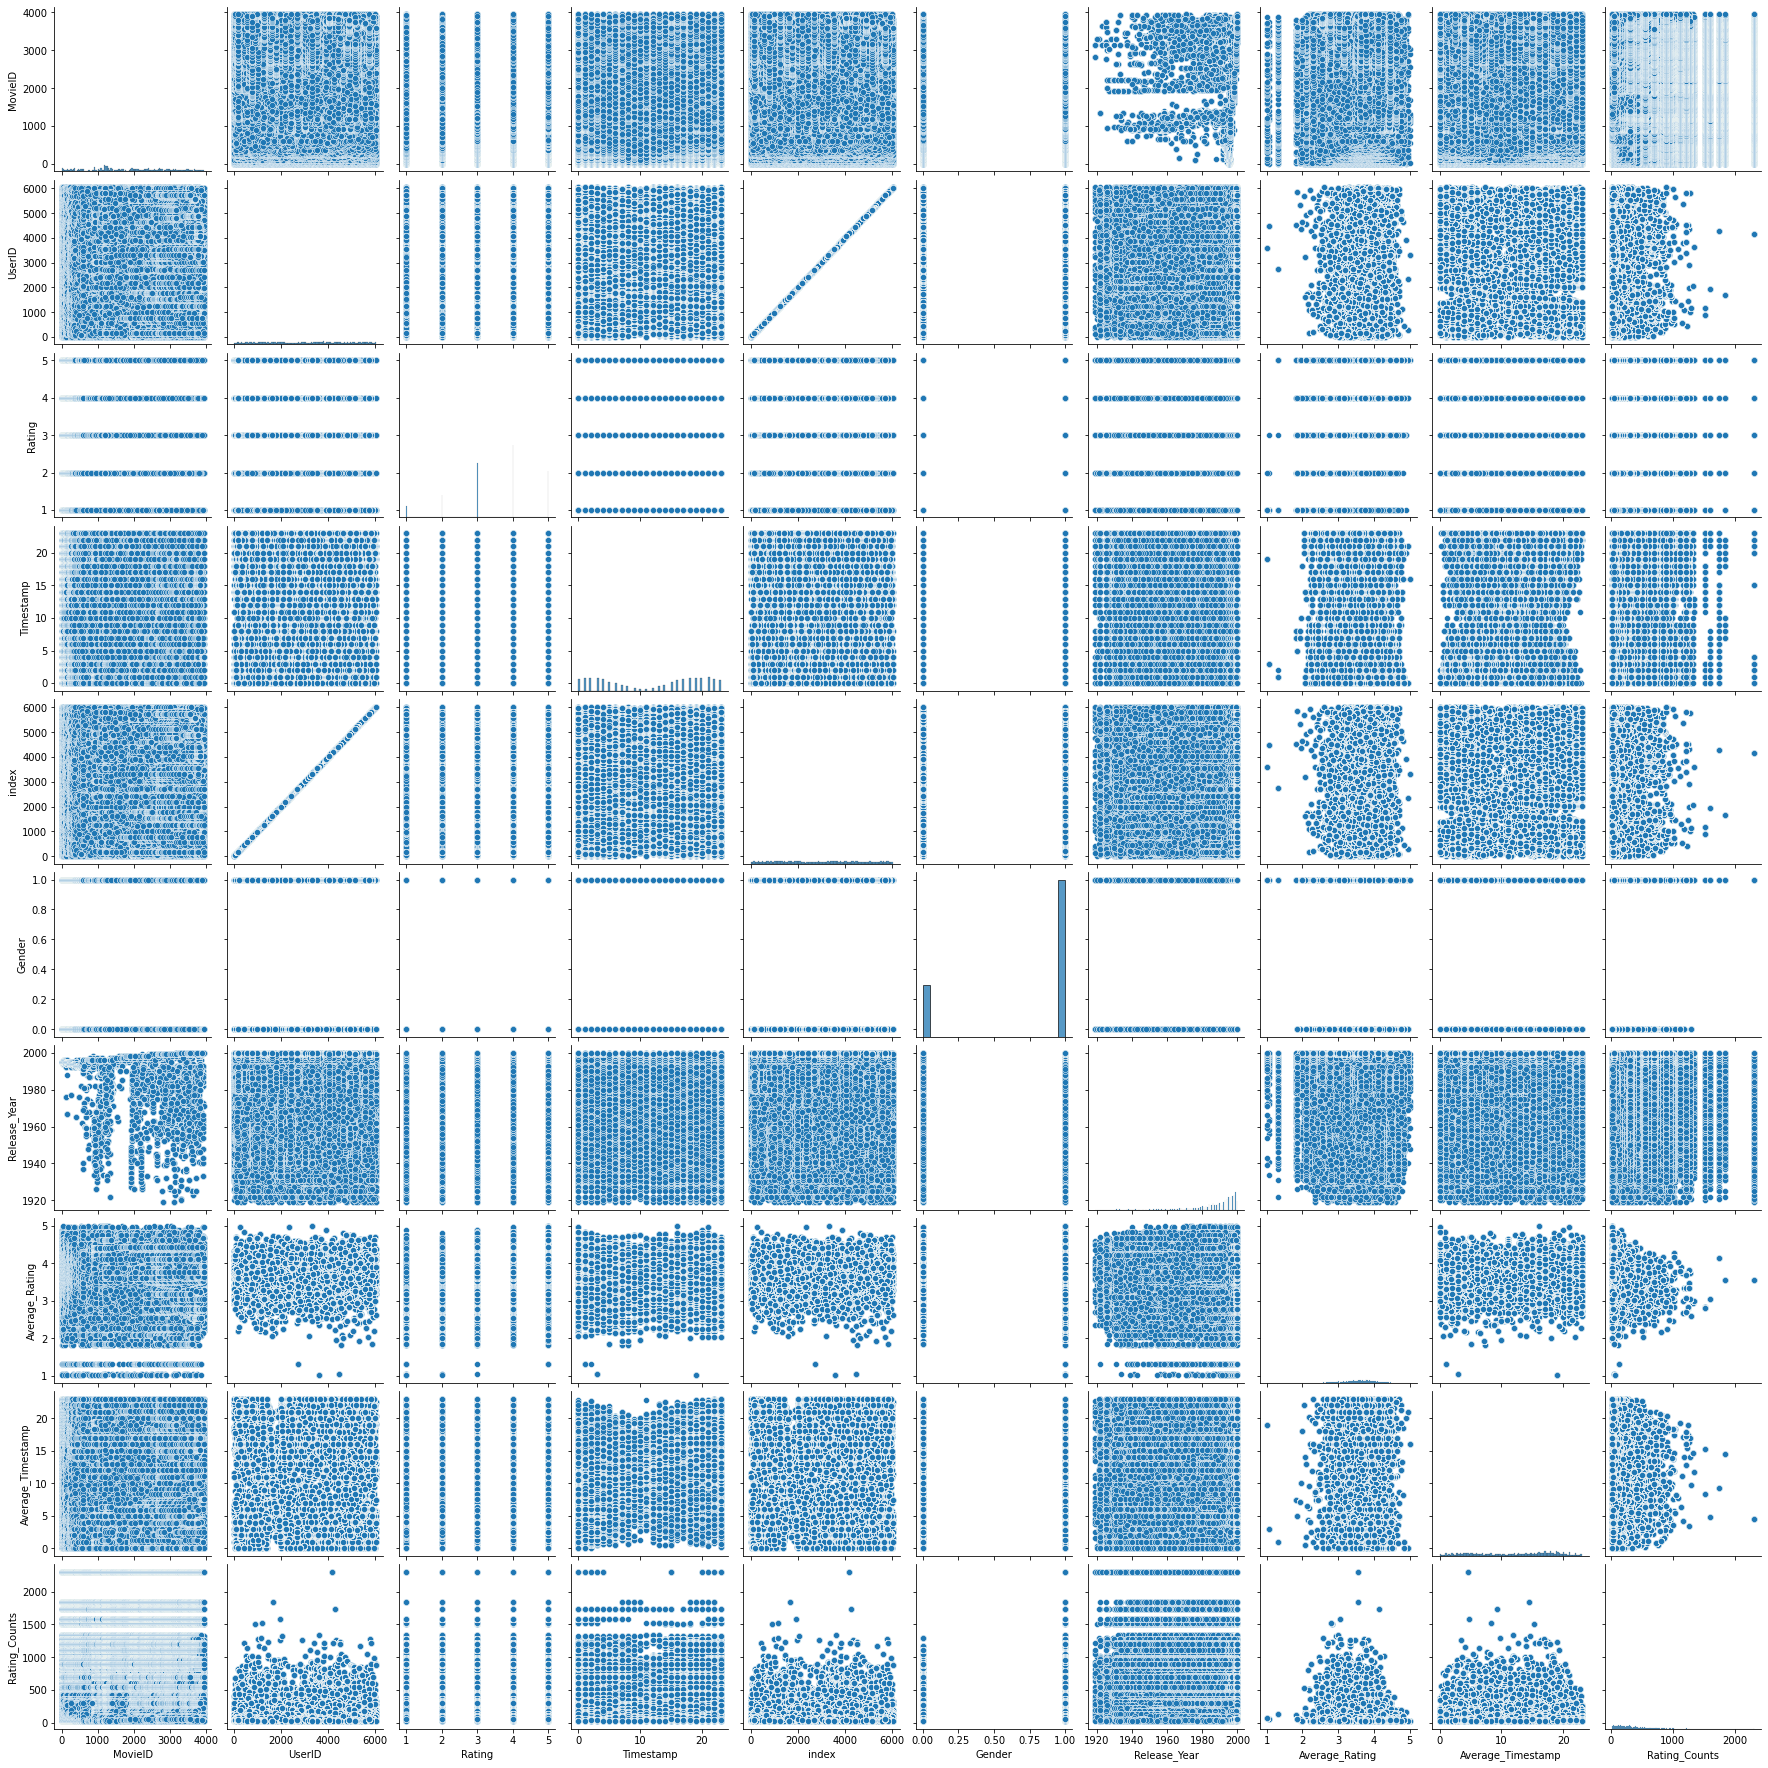

In [ ]:
sns.pairplot(df)

In [ ]:
## correlation matrix for heat map
df.corr()

,MovieID,UserID,Rating,Timestamp,Gender,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
MovieID,1.000000,-0.017799,-0.063106,0.003628,0.021458,-0.015706,-0.010083,0.005287,0.003087
UserID,-0.017799,1.000000,0.012142,0.019491,-0.035115,-0.031569,0.031103,0.023725,-0.025659
Rating,-0.063106,0.012142,1.000000,0.007323,-0.020160,-0.154817,0.390367,0.008171,-0.121329
Timestamp,0.003628,0.019491,0.007323,1.000000,0.007467,-0.004587,0.017196,0.821552,-0.020170
Gender,0.021458,-0.035115,-0.020160,0.007467,1.000000,-0.002147,-0.051644,0.009089,0.083861
Release_Year,-0.015706,-0.031569,-0.154817,-0.004587,-0.002147,1.000000,-0.083179,-0.008255,-0.010287
Average_Rating,-0.010083,0.031103,0.390367,0.017196,-0.051644,-0.083179,1.000000,0.020931,-0.310808
Average_Timestamp,0.005287,0.023725,0.008171,0.821552,0.009089,-0.008255,0.020931,1.000000,-0.024552
Rating_Counts,0.003087,-0.025659,-0.121329,-0.020170,0.083861,-0.010287,-0.310808,-0.024552,1.000000


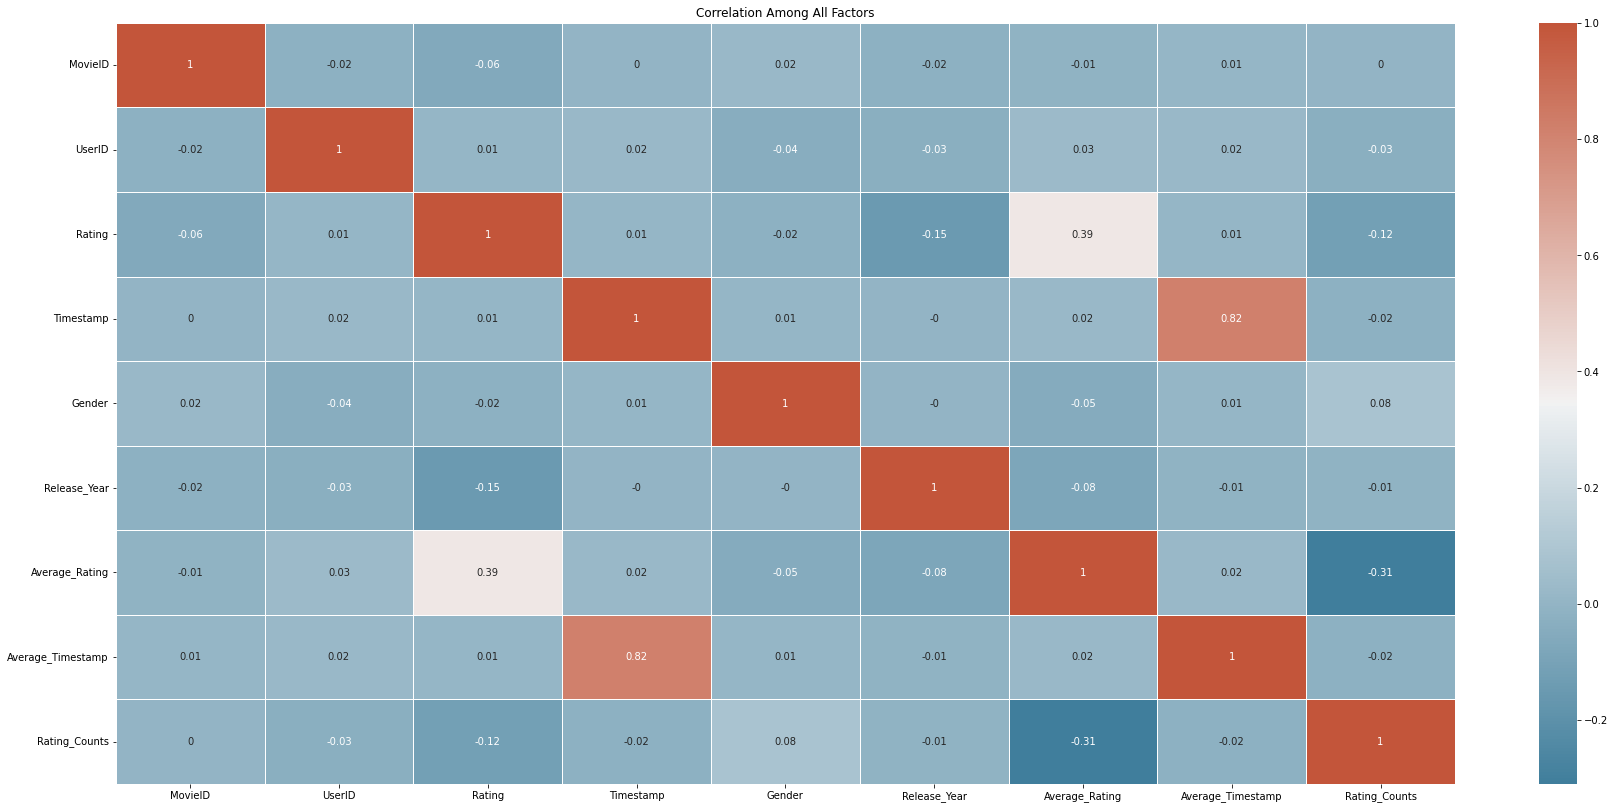

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(30,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors')
sns.heatmap(np.round(df_corr,2), annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

In [ ]:
## spearman correlation matrix for heat map, used for better understanding 
df.corr('spearman')

,MovieID,UserID,Rating,Timestamp,Gender,Release_Year,Average_Rating,Average_Timestamp,Rating_Counts
MovieID,1.000000,-0.016434,-0.069092,0.003264,0.022019,0.059512,-0.011972,0.004774,-0.005130
UserID,-0.016434,1.000000,0.011713,0.002778,-0.034513,-0.046061,0.027265,0.018902,-0.023144
Rating,-0.069092,0.011713,1.000000,0.005091,-0.020896,-0.138091,0.377621,0.009248,-0.137660
Timestamp,0.003264,0.002778,0.005091,1.000000,0.007591,-0.001743,0.013200,0.794128,-0.014541
Gender,0.022019,-0.034513,-0.020896,0.007591,1.000000,-0.020077,-0.051988,0.007681,0.076741
Release_Year,0.059512,-0.046061,-0.138091,-0.001743,-0.020077,1.000000,-0.077341,-0.008256,-0.037684
Average_Rating,-0.011972,0.027265,0.377621,0.013200,-0.051988,-0.077341,1.000000,0.024397,-0.343674
Average_Timestamp,0.004774,0.018902,0.009248,0.794128,0.007681,-0.008256,0.024397,1.000000,-0.034616
Rating_Counts,-0.005130,-0.023144,-0.137660,-0.014541,0.076741,-0.037684,-0.343674,-0.034616,1.000000


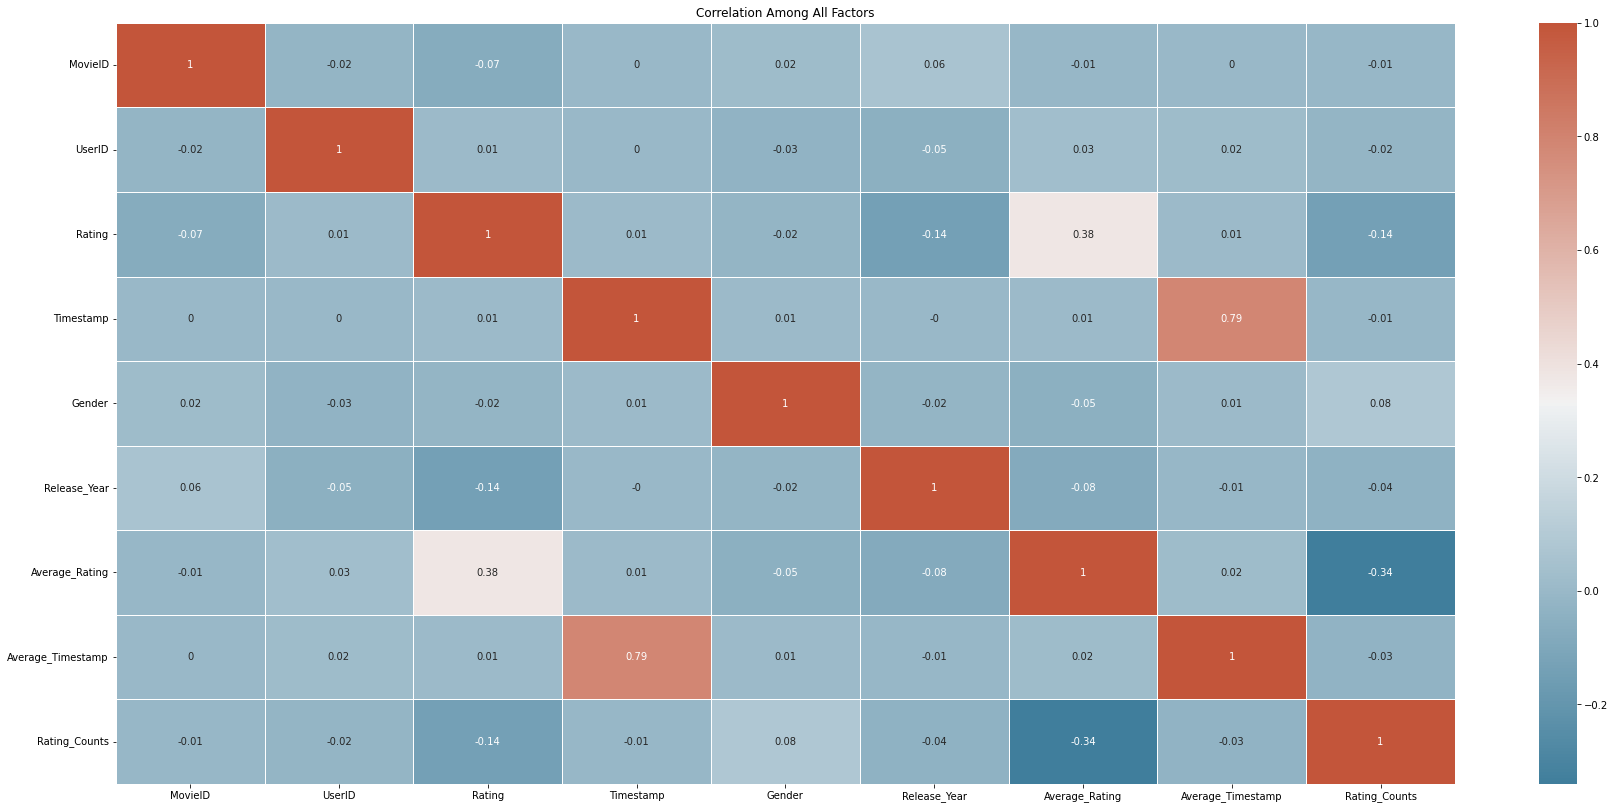

In [ ]:
df_corr = df.corr('spearman')
plt.figure(figsize=(30,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among All Factors')
sns.heatmap(np.round(df_corr,2), annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

Observations:
1. No Correlation is seen between any Features.
2. There is no Evidence that More Screen time results more rating 

# ITEM BASED APPROACH

# Build a Recommender System based on Pearson Correlation

In [ ]:
# Creates a pivot table dataframe
table1 = pd.pivot_table(df, index ='UserID',columns='Title',values='Rating', aggfunc='mean')
table1.fillna(0,inplace=True)
table1

Title,,a chef in love,a space odyssey,abbott and costello meet frankenstein,abominable snowman the,about adam,about last night,above the rim,absent minded professor the,absolute power,...,young guns ii,young poisoners handbook the,young sherlock holmes,your friends and neighbors,youve got mail,zachariah,zed two noughts a,zero effect,zero kelvin,zeus and roxanne
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#checking data sparsity
n_users=df['UserID'].nunique()
n_movies=df['MovieID'].nunique()
sparsity=round(1.0-df.shape[0]/float(n_users*n_movies),3)
print('Sparsity of dataset:'+ str(sparsity*100)+'%')

Sparsity of dataset:95.5%


In [ ]:
#Top similar 5 movies for movie 'adam adam'
print("here are a list of 5 movies to recommend to a user who has liked 'about adam'")
print(table1.corr()['about adam'].sort_values(ascending=False).iloc[1:6])

here are a list of 5 movies to recommend to a user who has liked 'about adam'
Title
identification of a woman        0.387823
separation the                   0.369745
cheetah                          0.269400
safe passage                     0.267653
smiling fish and goat on fire    0.242155
Name: about adam, dtype: float64


In [ ]:
# Take input from user
print("please input the Movie name:")
a=input()
#Printing Top 5 similar Movies for recommendation
print("The Top 5 Similar Movies are:")
print(table1.corr()[a].sort_values(ascending=False).iloc[1:6])

please input the Movie name:
liar liar
The Top 5 Similar Movies are:
Title
mrs doubtfire                0.499927
dumb  dumber                 0.459601
ace ventura pet detective    0.458654
home alone                   0.453982
wedding singer the           0.429222
Name: liar liar, dtype: float64


# Build a Recommender System based on Cosine Similarity

In [ ]:
matrix=table1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity=cosine_similarity(matrix)
item_similarity=cosine_similarity(matrix.T)

In [ ]:
user_similarity #user-user similarity using Cosine similarity

array([[1.        , 0.09744712, 0.12365275, ..., 0.        , 0.17878902,
        0.13558235],
       [0.09744712, 1.        , 0.1514786 , ..., 0.06611767, 0.07366603,
        0.22524253],
       [0.12365275, 0.1514786 , 1.        , ..., 0.12023352, 0.09588437,
        0.13889985],
       ...,
       [0.        , 0.06611767, 0.12023352, ..., 1.        , 0.16377988,
        0.10020251],
       [0.17878902, 0.07366603, 0.09588437, ..., 0.16377988, 1.        ,
        0.22495658],
       [0.13558235, 0.22524253, 0.13889985, ..., 0.10020251, 0.22495658,
        1.        ]])

In [ ]:
item_similarity #item-item similarity using cosine similarity

array([[1.        , 0.08103149, 0.47713092, ..., 0.19422964, 0.0499589 ,
        0.02627491],
       [0.08103149, 1.        , 0.08124235, ..., 0.07031233, 0.        ,
        0.        ],
       [0.47713092, 0.08124235, 1.        , ..., 0.21344055, 0.03333554,
        0.04487888],
       ...,
       [0.19422964, 0.07031233, 0.21344055, ..., 1.        , 0.05922839,
        0.01683785],
       [0.0499589 , 0.        , 0.03333554, ..., 0.05922839, 1.        ,
        0.        ],
       [0.02627491, 0.        , 0.04487888, ..., 0.01683785, 0.        ,
        1.        ]])

In [ ]:
user_sim_matrix=pd.DataFrame(user_similarity,index=matrix.index,columns=matrix.index)
user_sim_matrix.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.097447,0.123653,0.133919,0.091155,0.181273,0.060338,0.138379,0.212825,0.251645,...,0.172474,0.081406,0.091966,0.034035,0.115384,0.191563,0.139825,0.000000,0.178789,0.135582
2,0.097447,1.000000,0.151479,0.194308,0.114394,0.102000,0.305787,0.211120,0.200854,0.229755,...,0.153265,0.091222,0.294748,0.014286,0.184237,0.235248,0.207965,0.066118,0.073666,0.225243
3,0.123653,0.151479,1.000000,0.151227,0.062907,0.088017,0.138332,0.086531,0.139331,0.217010,...,0.092960,0.135484,0.161507,0.000000,0.106080,0.145188,0.108627,0.120234,0.095884,0.138900
4,0.133919,0.194308,0.151227,1.000000,0.045094,0.013681,0.130339,0.100856,0.094285,0.119845,...,0.163629,0.093041,0.382803,0.000000,0.094549,0.169893,0.128509,0.062907,0.065460,0.150946
5,0.091155,0.114394,0.062907,0.045094,1.000000,0.047983,0.126257,0.220817,0.263097,0.118546,...,0.100652,0.035732,0.065278,0.054151,0.182032,0.297723,0.174103,0.020459,0.028042,0.244556


In [ ]:
# NearestNeighbors to find similar movies to recommend
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6, n_jobs=-1)
knn.fit(matrix.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

In [ ]:
distances , indices = knn.kneighbors(matrix.T,n_neighbors=6)

In [ ]:
result=pd.DataFrame(indices,columns=['Title1','Title2','Title3','Title4','Title5','Title6'])
result.head()

,Title1,Title2,Title3,Title4,Title5,Title6
0,0,2,383,668,954,667
1,1,839,2578,1808,148,2323
2,2,668,383,667,62,3043
3,3,739,1633,3426,1060,2680
4,4,2189,1520,2244,2171,2170


In [ ]:
result2=result.copy()
for i in range(1,7):
  mov=pd.DataFrame(matrix.T.index).reset_index()
  mov=mov.rename(columns={'index':f'Title{i}'})
  result2=pd.merge(result2,mov,on=[f'Title{i}'],how='left')
  result2=result2.drop(f'Title{i}',axis=1)
  result2=result2.rename(columns={'Title':f'Title{i}'})

result2.rename(columns = {'Title1':'Title','Title2':'Nearest_title1','Title3':'Nearest_title2',
                          'Title4':'Nearest_title4','Title5':'Nearest_title4','Title6':'Nearest_title5'}, inplace = True)
result2[1:6]

,Title,Nearest_title1,Nearest_title2,Nearest_title4,Nearest_title4,Nearest_title5
1,a chef in love,death in the garden,proposition the,last of the high kings the,another mans poison,number seventeen
2,a space odyssey,close encounters of the third kind,blade runner,clockwork orange a,alien,star wars episode iv a new hope
3,abbott and costello meet frankenstein,creature from the black lagoon the,invisible man the,voyage to the bottom of the sea,fantastic voyage,return of the fly
4,abominable snowman the,mutters courage,house of dracula,nemesis nebula,mummys hand the,mummys ghost the
5,about adam,identification of a woman,separation the,cheetah,safe passage,smiling fish and goat on fire


In [ ]:
# Take input from user
print("please input the Movie name:")
movie_name=input()
#Printing Top 5 similar Movies for recommendation
print("The Top 5 Similar Movies are:")
result2.loc[result2['Title']==movie_name]

please input the Movie name:
liar liar
The Top 5 Similar Movies are:


,Title,Nearest_title1,Nearest_title2,Nearest_title4,Nearest_title4,Nearest_title5
1840,liar liar,mrs doubtfire,ace ventura pet detective,dumb dumber,home alone,waynes world


# Build a Recommender System based on Matrix Factorization

In [ ]:
rm=df.pivot(index='UserID',columns='MovieID',values='Rating').fillna(0)
rm.head(5)


MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rm_raw = df[['UserID', 'MovieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,1,5
1,1,48,5


In [ ]:
from cmfrec import CMF
model = CMF(method="als", k=4, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
model.A_.shape, model.B_.shape

((6040, 4), (3682, 4))

In [ ]:
rm_raw.Rating.mean(), model.glob_mean_

(3.57998542379415, 3.5799853801727295)

In [ ]:
# calculating Predicted Ratings
rm_=np.dot(model.A_, model.B_.T)+ model.glob_mean_ 

In [ ]:
# RMSE Error
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(rm.values[rm>0],rm_[rm>0],squared=False)
print ('RMSE: ' + str(rmse))

RMSE: 1.475653561527743


In [ ]:
# MAPE Error
from sklearn.metrics import mean_absolute_percentage_error

mape=mean_absolute_percentage_error(rm.values[rm>0],rm_[rm>0])
print ('MAPE: ' + str(mape))

MAPE: 0.42228753211692427


In [ ]:
# User-User embedding
User_User_embedding=cosine_similarity(model.A_)
User_User_embedding

array([[ 0.99999994, -0.08807255,  0.36307815, ..., -0.31150767,
         0.9453766 ,  0.27851325],
       [-0.08807255,  0.99999994, -0.51266956, ..., -0.00825458,
        -0.40687895,  0.6629223 ],
       [ 0.36307815, -0.51266956,  1.0000001 , ...,  0.23402148,
         0.50284976,  0.27974468],
       ...,
       [-0.31150767, -0.00825458,  0.23402148, ...,  0.99999994,
        -0.25871277,  0.31190187],
       [ 0.9453766 , -0.40687895,  0.50284976, ..., -0.25871277,
         1.0000001 ,  0.04626301],
       [ 0.27851325,  0.6629223 ,  0.27974468, ...,  0.31190187,
         0.04626301,  1.        ]], dtype=float32)

In [ ]:
user_sim_matrix=pd.DataFrame(User_User_embedding,index=matrix.index,columns=matrix.index)
user_sim_matrix.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.088073,0.363078,-0.249395,0.718838,0.332625,-0.010086,-0.625572,-0.449215,-0.569905,...,-0.496325,0.714246,0.437348,-0.171099,0.747024,0.197282,0.826462,-0.311508,0.945377,0.278513
2,-0.088073,1.000000,-0.512670,0.060343,0.581220,0.332946,0.154381,-0.569656,0.040253,0.778155,...,0.520587,0.616675,0.529284,0.321486,-0.210402,-0.671947,-0.586832,-0.008255,-0.406879,0.662922
3,0.363078,-0.512670,1.000000,0.659688,-0.069559,0.485552,0.656270,0.443274,0.451820,-0.261294,...,-0.066160,-0.179580,0.426872,0.103937,0.857165,0.880987,0.506355,0.234021,0.502850,0.279745
4,-0.249395,0.060343,0.659688,1.000000,-0.195940,0.542990,0.924487,0.580668,0.891166,0.533799,...,0.604393,-0.278901,0.580906,0.369959,0.435821,0.550717,-0.294509,0.409845,-0.246904,0.562157
5,0.718838,0.581220,-0.069559,-0.195940,1.000000,0.596940,-0.019081,-0.878569,-0.454072,0.046251,...,-0.203922,0.939292,0.632261,0.281837,0.416944,-0.394899,0.316749,-0.040267,0.475994,0.678728


In [ ]:
# Item-Item embedding
Item_Item_embedding=cosine_similarity(model.B_)
Item_Item_embedding

array([[ 1.0000001 , -0.058749  ,  0.95450747, ...,  0.76212126,
        -0.653695  ,  0.6034498 ],
       [-0.058749  ,  1.        ,  0.0850298 , ..., -0.03379729,
         0.2730069 , -0.37590423],
       [ 0.95450747,  0.0850298 ,  1.        , ...,  0.8809599 ,
        -0.6711108 ,  0.683148  ],
       ...,
       [ 0.76212126, -0.03379729,  0.8809599 , ...,  1.        ,
        -0.861548  ,  0.91796774],
       [-0.653695  ,  0.2730069 , -0.6711108 , ..., -0.861548  ,
         0.9999999 , -0.92368925],
       [ 0.6034498 , -0.37590423,  0.683148  , ...,  0.91796774,
        -0.92368925,  1.        ]], dtype=float32)

In [ ]:
item_sim_matrix=pd.DataFrame(Item_Item_embedding,index=rm_raw['ItemId'].unique(),columns=rm_raw['ItemId'].unique())
item_sim_matrix.head()

,1,48,150,260,527,531,588,594,595,608,...,872,2480,3656,3172,989,3280,642,1915,3779,1832
1,1.000000,-0.058749,0.954507,0.911087,0.952640,0.666721,0.909237,0.764234,0.882831,0.659934,...,-0.184447,-0.095996,0.147259,0.494630,0.158347,-0.558085,0.217393,0.762121,-0.653695,0.603450
48,-0.058749,1.000000,0.085030,-0.385942,-0.355209,0.483500,0.360928,0.375136,0.379983,-0.481997,...,0.963261,0.543983,-0.148307,-0.425367,-0.872222,-0.610512,0.756991,-0.033797,0.273007,-0.375904
150,0.954507,0.085030,1.000000,0.880058,0.879090,0.571414,0.934890,0.666851,0.876782,0.441278,...,-0.005420,-0.229939,-0.111797,0.409813,-0.087008,-0.576731,0.199331,0.880960,-0.671111,0.683148
260,0.911087,-0.385942,0.880058,1.000000,0.975596,0.313627,0.697035,0.438496,0.621809,0.683195,...,-0.476215,-0.464876,0.030740,0.659084,0.354433,-0.202909,-0.198420,0.786868,-0.672279,0.749555
527,0.952640,-0.355209,0.879090,0.975596,1.000000,0.454423,0.743251,0.583664,0.709877,0.731476,...,-0.451188,-0.287021,0.132093,0.572249,0.385567,-0.340903,-0.036010,0.755862,-0.721564,0.713486


In [ ]:
movie_name=150
movie_rating=item_sim_matrix[movie_name]
print(movie_rating)

1       0.954507
48      0.085030
150     1.000000
260     0.880058
527     0.879090
          ...   
3280   -0.576731
642     0.199331
1915    0.880960
3779   -0.671111
1832    0.683148
Name: 150, Length: 3682, dtype: float32


In [ ]:
similar_movies=item_sim_matrix.corrwith(movie_rating)

sim_df=pd.DataFrame(similar_movies,columns=['Correlation'])

In [ ]:
item_mov=df[['MovieID','Title']]
item_mov.drop_duplicates(inplace=True)
item_mov.reset_index(drop=True,inplace=True)

sim_df1=sim_df.copy()
sim_df1.reset_index(inplace=True)
sim_df1.rename(columns={'index':'MovieID'},inplace=True)
sim_mov=pd.merge(sim_df1,item_mov,on="MovieID",how='inner')
sim_mov.head(6)

,MovieID,Correlation,Title
0,1,0.953083,toy story
1,48,-0.289414,pocahontas
2,150,1.000000,apollo
3,260,0.921454,star wars episode iv a new hope
4,527,0.906801,schindlers list
5,531,0.632564,secret garden the


In [ ]:
# For d=2 Matrix Factorization using Embeddings
from cmfrec import CMF
model1 = CMF(method="als", k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model1.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


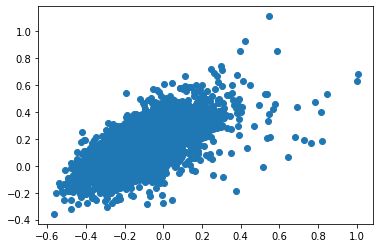

In [ ]:
plt.scatter(model1.A_[:,0],model1.A_[:,1],cmap='hot')

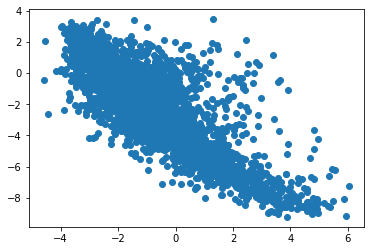

In [ ]:
plt.scatter(model1.B_[:,0],model1.B_[:,1],cmap='hot')

**1. Users of which age group have watched and rated the most number of movies?**

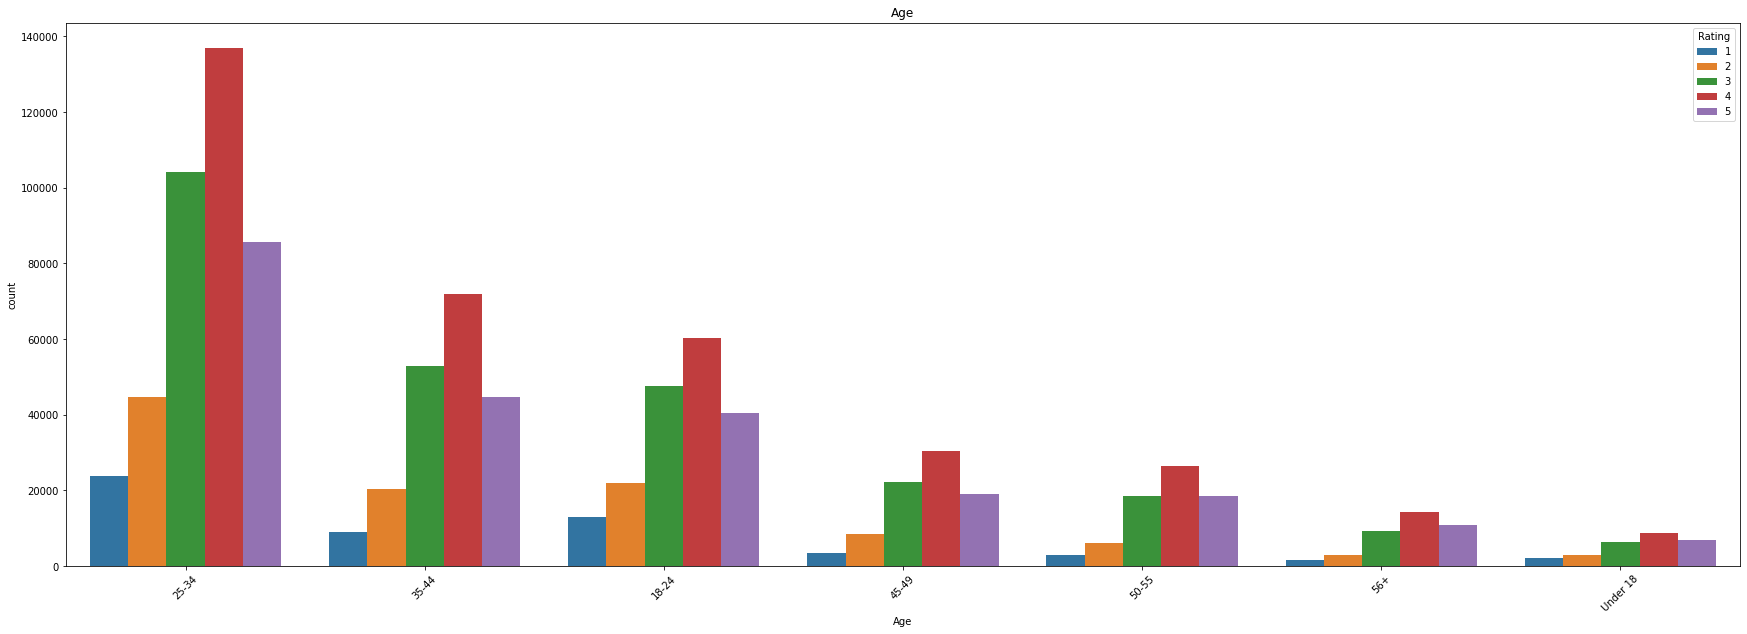

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Age',hue='Rating', 
              order = df['Age'].value_counts().index[:], linewidth=0.3)
plt.title('Age')
plt.xticks(rotation=45)
plt.show()

ANS: Age Group of 25-34 watched more and rated more.

**2.Users belonging to which profession have watched and rated the most movies?**

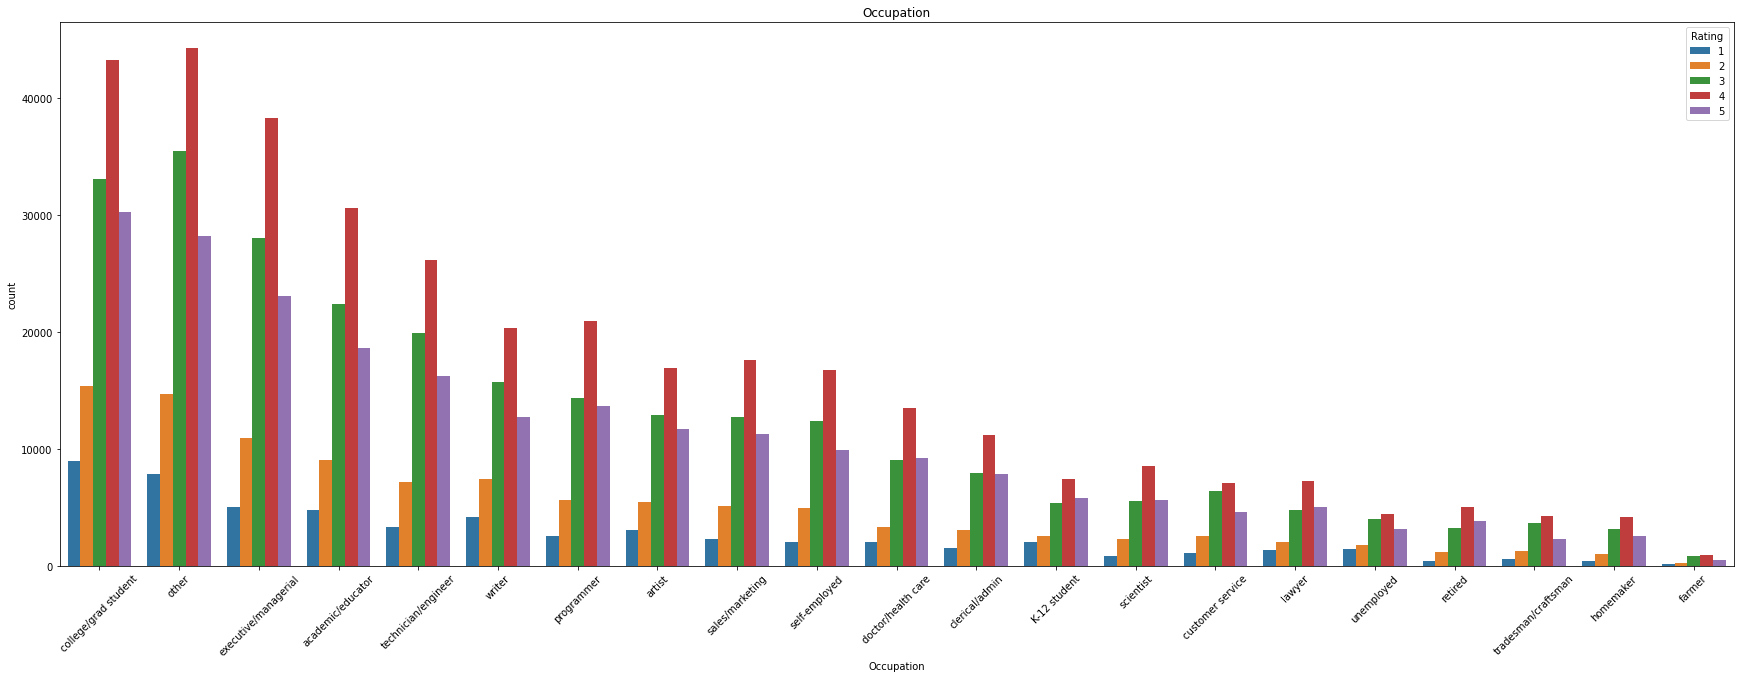

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Occupation', hue='Rating',
              order = df['Occupation'].value_counts().index[:], linewidth=0.3)
plt.title('Occupation')
plt.xticks(rotation=45)
plt.show()

ANS: College/Grad Student had Rated more movies and watched more compared to other.

**3.Most of the users in our dataset who’ve rated the movies are Male. (T/F)**

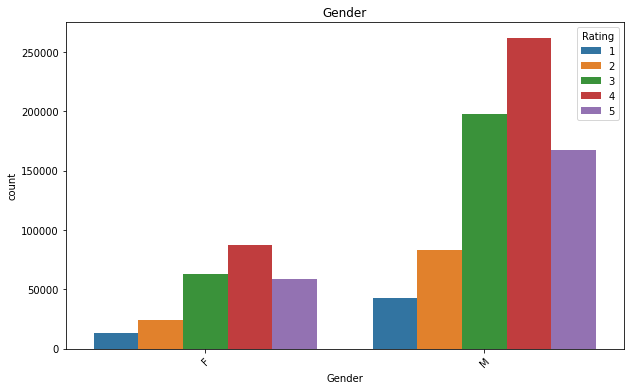

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data = df, 
              x = 'Gender',hue='Rating',
              order = sorted(df['Gender'].value_counts().index[:]), linewidth=0.3)
plt.title('Gender')
plt.xticks(rotation=45)
plt.show()

ANS: **TRUE**

**4. Most of the movies present in our dataset were released in which decade?**

    **a.70s b. 90s c. 50s d.80s **



In [ ]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'index',
       'Gender', 'Age', 'Occupation', 'Zip-code', 'Release_Year',
       'Release_Decade', 'Average_Rating', 'Average_Timestamp',
       'Rating_Counts'],
      dtype='object')

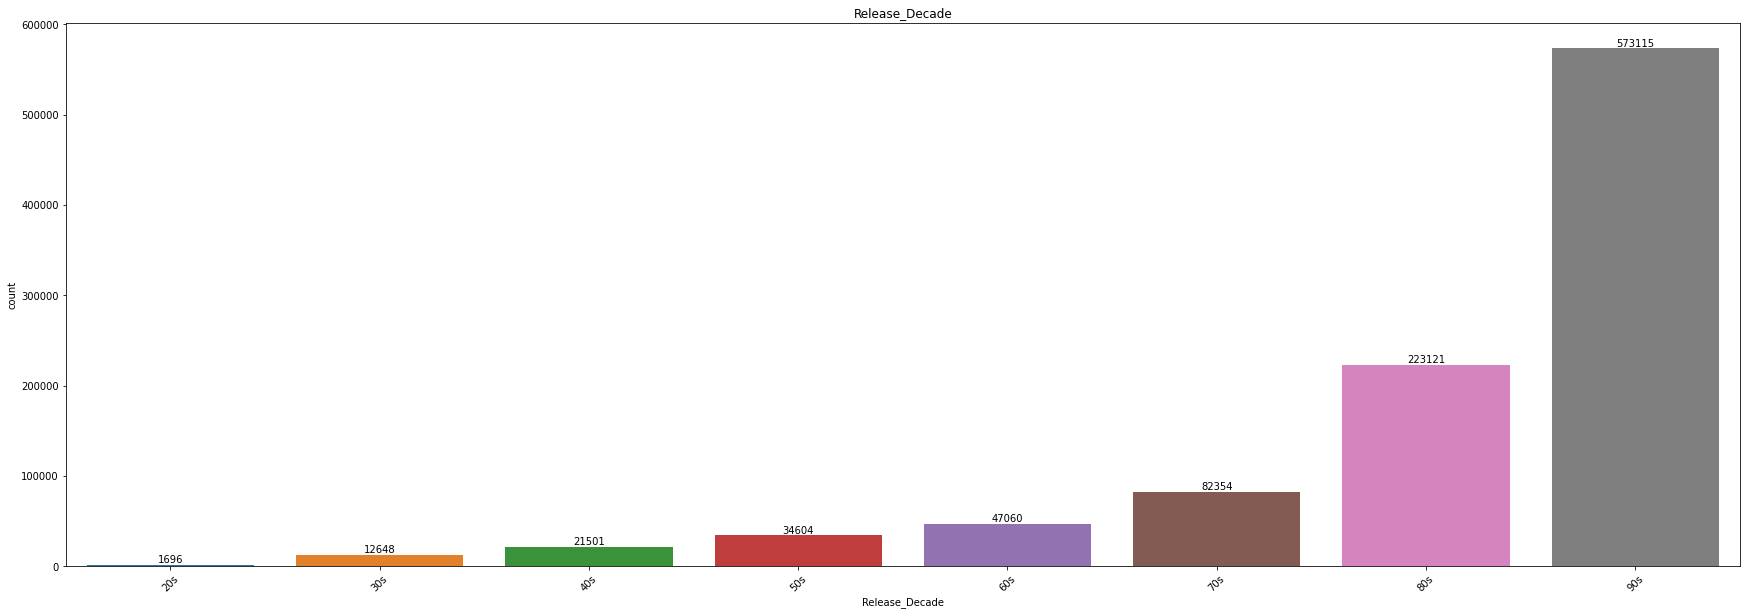

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df, 
              x = 'Release_Decade', 
              order = sorted(df['Release_Decade'].value_counts().index[:20]), linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Release_Decade')
plt.xticks(rotation=45)
plt.show()

ANS:  **B(90's)**

**5.The movie with maximum no. of ratings is ___?**

In [ ]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Release_Year', 'Release_Decade',
       'Average_Rating', 'Average_Timestamp', 'Rating_Counts'],
      dtype='object')

In [ ]:
ans=df.groupby('Title').agg({'Rating':'sum'})
ans=ans.reset_index()
ans.sort_values('Rating').tail(5)

,Title,Rating
3044,star wars episode v the empire strikes back,12836
3043,star wars episode iv a new hope,13321
1837,lethal weapon,14619
89,american beauty,14800
3301,toy story,15300


ANS: **toy story with 15300 ratings**

**6.Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach?**

In [ ]:
# Take input from user
print("please input the Movie name:")
a=input()
#Printing Top 5 similar Movies for recommendation
print("The Top 5 Similar Movies are:")
print(table1.corr()[a].sort_values(ascending=False).iloc[1:6])

please input the Movie name:
liar liar
The Top 5 Similar Movies are:
Title
mrs doubtfire                0.499927
dumb  dumber                 0.459601
ace ventura pet detective    0.458654
home alone                   0.453982
wedding singer the           0.429222
Name: liar liar, dtype: float64


**7.On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based?**

**Memory**-based collaborative filtering uses all the data in the database to generate a prediction.

**model**-based collaborative filtering uses the data in the database to create a model that can then be used to generate predictions

**8.Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___?**

**Pearson Correlation** ranges from -1 to 1

**cosine similarity** ranges from 0 to 1

**9.Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.**

# RMSE: 1.475653561527743
# MAPE: 0.42228753211692427

**10. Give the sparse ‘row’ matrix representation for the following dense matrix -**

[[1 0]
[3 7]]

In [ ]:
from scipy.sparse import csr_matrix

a= np.array([[1,0],[3,7]])
sparse_matrix = csr_matrix(a)
print(sparse_matrix)

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7


**Insights:**

1. Movies with Rating 4 are more.
2. Age Group of 25-34 watched more and rated more
3. More Movies are released on 90's.
4. More Users has Screen time more than 20 hours.
5. College/Grad Students are more to see the movie and Rate them.
6. More males users are watching Movies and rating them.
7. More Users are from Area zip code- 94110
8. No Correlation is seen between any Features.
9. There is no Evidence that More Screen time results more rating 
10. Movie 'saboteur' got highest number of ratings i.e 2314 ratings.
11. RMSE: 1.475653561527743
12. MAPE: 0.42228753211692427

**Recommendations For Zee To Improve Business:**

1. Company should Focus College and grad students by offering some Discount as they are most viewers according to data.
2. Company should Recommend Most rating Films to others who love similar Genres.
3. Comapany need to Focus on Zip code area 94110 as ther are more watch Hours from that area.
4.  Company Should Target Audience with Age Group of 25-34.